# TP LABORATORIO
### Juan Ignacio Jimenez Copati

## *Análisis numérico*

### *OBTENCIÓN DE FUNCIÓN TRANSFERENCIA*

In [2]:
#%% Librerías externas NumPy, SciPy y Matplotlib
from scipy import signal as sig  
import matplotlib.pyplot as plt               #le doy un nombre (plt) al matplotlib para usarlo más comodamente
import numpy as np                            #le doy un nombre (np) al numpy para usarlo más comodamente
import math as m

import pandas as pd

##### Librería de TC2
from pytc2.general import print_latex, print_subtitle
import pytc2.sistemas_lineales as tc2 #libreria de la catedra.

#Para graficos

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
mpl.rcParams.update({'font.size':fig_font_size})

In [19]:
#%%

# Defino mi plantilla pasa altos

fs=1200
fp=4600
a_MAX=1
a_min=20

ws=fs*2*m.pi
wp=fp*2*m.pi

print_subtitle('Frecuencias normalizadas del pasa altos')

wp_n=1      # wp/wp
ws_n=ws/wp

print("Frecuencia paso HP:",wp_n)
print("Frecuencia stop HP:",ws_n)
#Defino mi plantilla pasa bajos prototipo aplicando transformación de frecuencias

zp_n=1
zs_n=1/ws_n

print_subtitle('Frecuencias normalizadas del pasa bajos')

print("Frecuencia paso LP:",zp_n)
print("Frecuencia stop LP:",zs_n)


#### Frecuencias normalizadas del pasa altos

Frecuencia paso HP: 1
Frecuencia stop HP: 0.2608695652173913


#### Frecuencias normalizadas del pasa bajos

Frecuencia paso LP: 1
Frecuencia stop LP: 3.8333333333333335


In [12]:
#%%

# Averiguo epsilon y 'n'

eps = m.sqrt(10**(a_MAX/10)-1)
n , z3db = sig.cheb1ord(zp_n, zs_n, a_MAX, a_min, True)

print_subtitle('Parámetros obtenidos')

print("Epsilon: ", eps)
print("Orden: ", n)

#%%

# Diseño de cheby con esos parámetros

z,p,k = sig.cheb1ap(n, a_MAX)
LP_SOS = sig.zpk2sos(z, p, k)

print_subtitle('TRANSFERENCIA PASA BAJOS PROTOTIPO')

tc2.pretty_print_SOS(LP_SOS)

#### Parámetros obtenidos

Epsilon:  0.5088471399095875
Orden:  2


#### TRANSFERENCIA PASA BAJOS PROTOTIPO

<IPython.core.display.Math object>

In [13]:
# Transformo mi pasa bajos a pasa altos

num_lp , den_lp = sig.zpk2tf(z, p, k)

num_hp , den_hp = sig.lp2hp(num_lp, den_lp)

HP_SOS = sig.tf2sos(num_hp, den_hp)

print_subtitle('TRANSFERENCIA PASA ALTOS')

tc2.pretty_print_SOS(HP_SOS)


#### TRANSFERENCIA PASA ALTOS

<IPython.core.display.Math object>

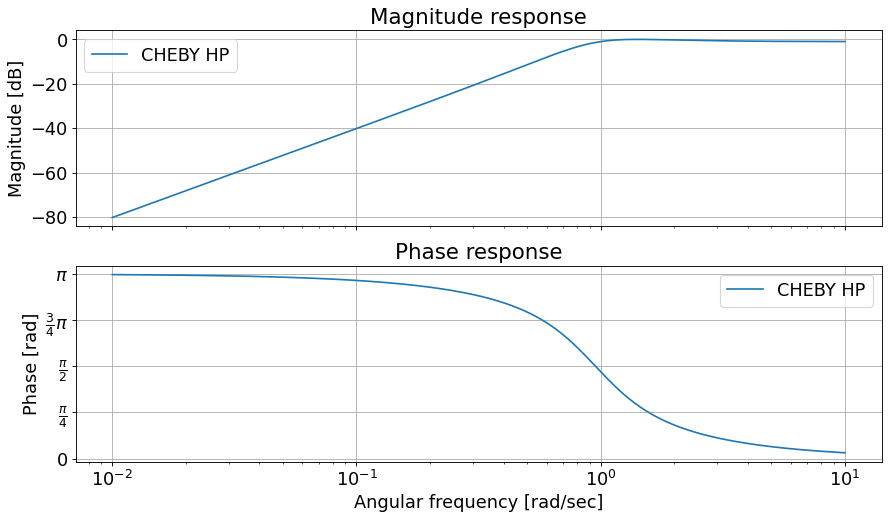

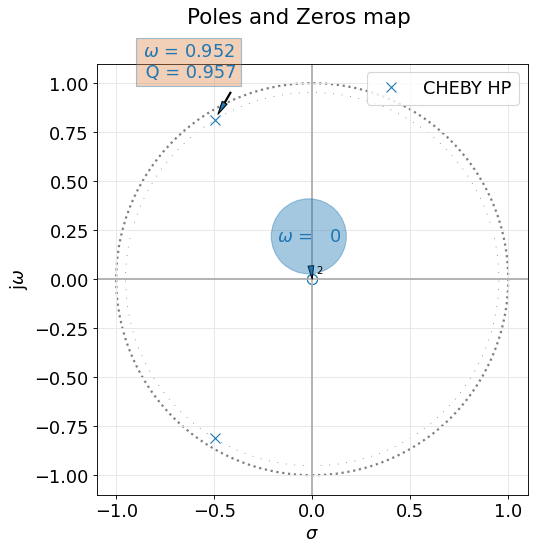

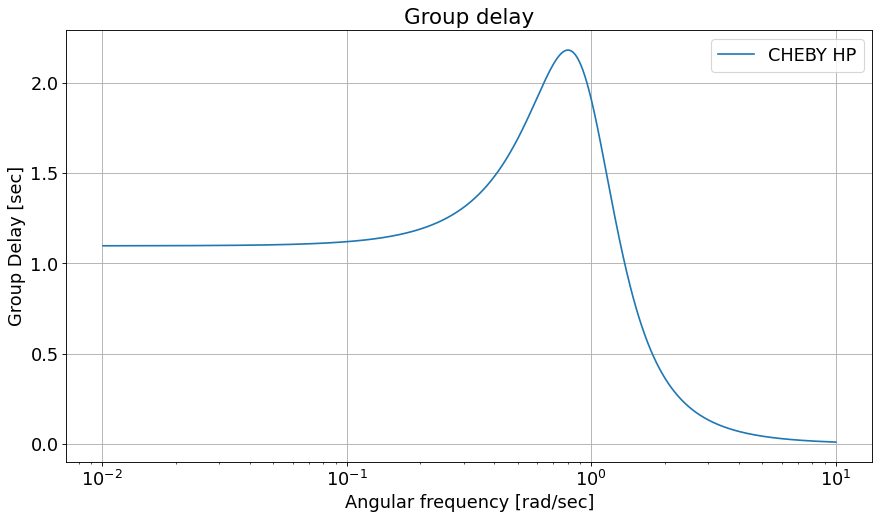

In [18]:
# Corro los gráficos para verificar las condiciones de plantilla

H1 = sig.TransferFunction(num_hp, den_hp)

tc2.analyze_sys(H1, 'CHEBY HP')

Si hacemos un acercamiento a las zonas críticas y con ayuda del cursor, se puede ver que las condiciones de plantilla se cumplieron.

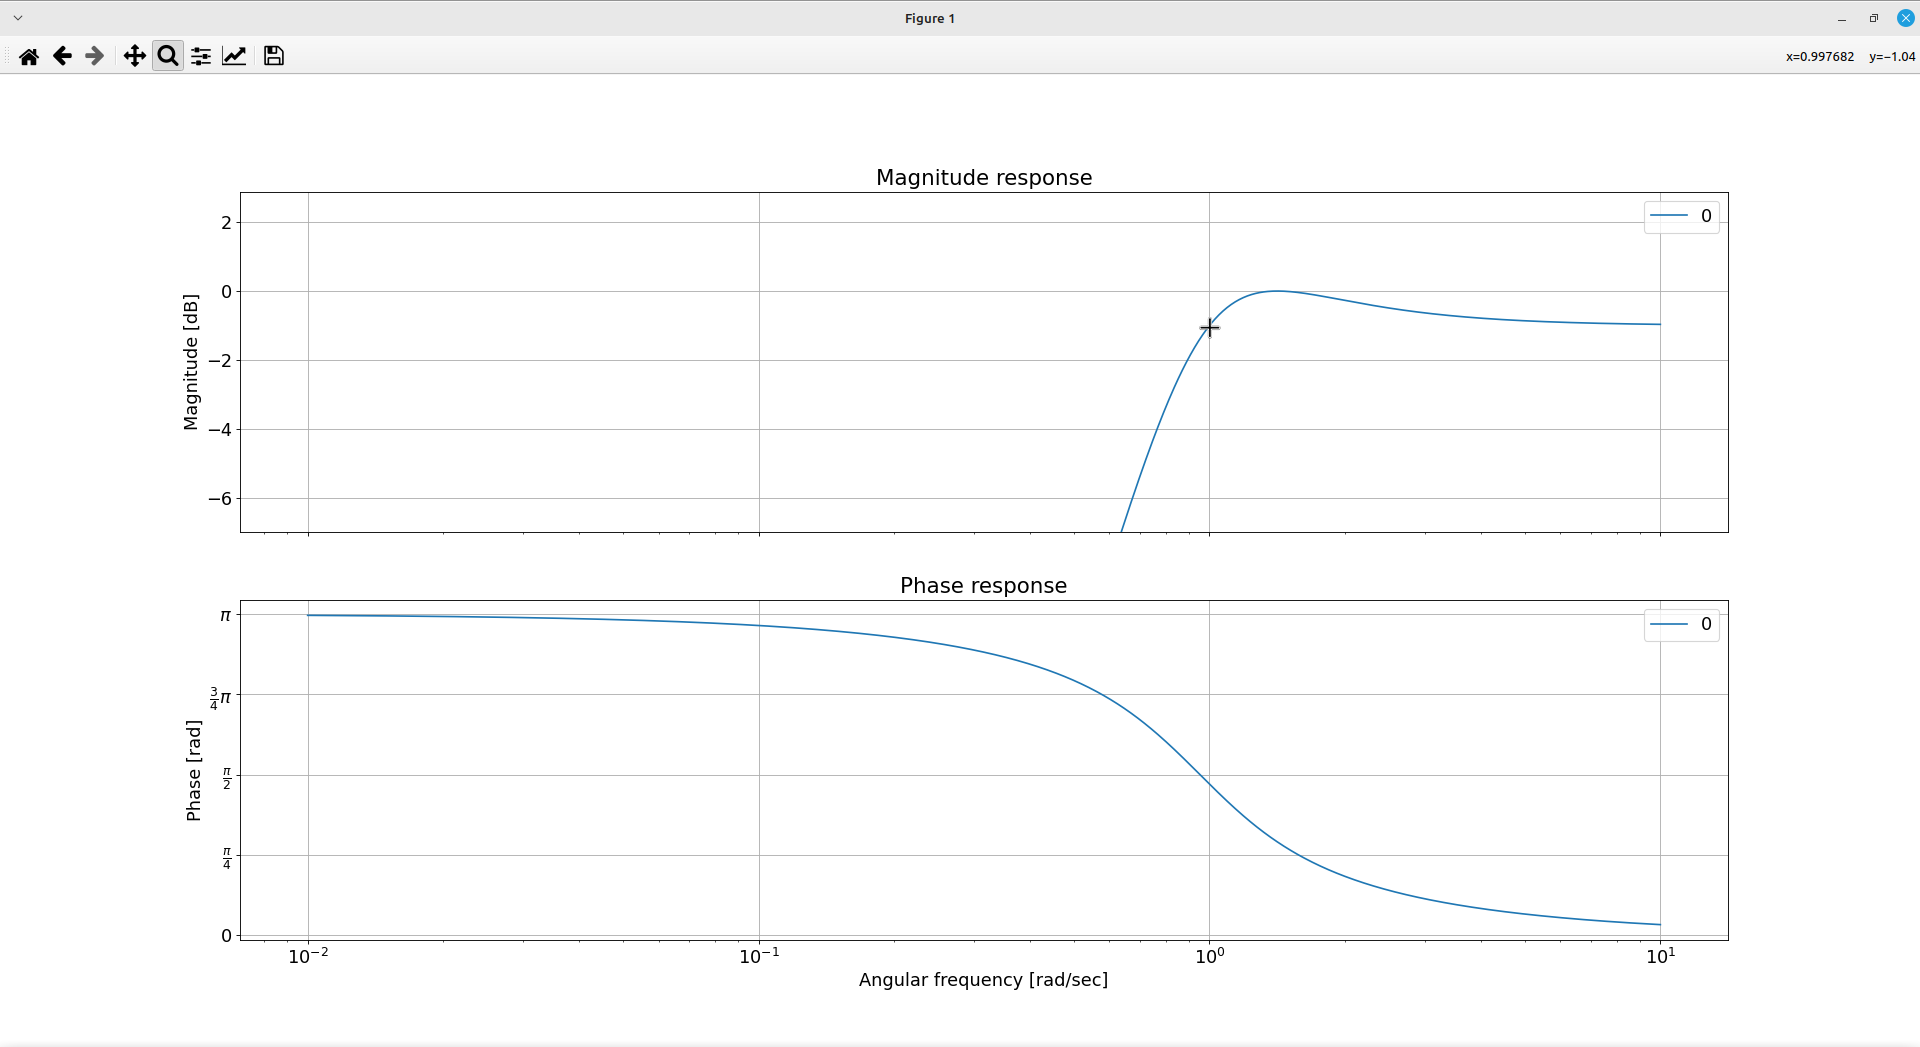

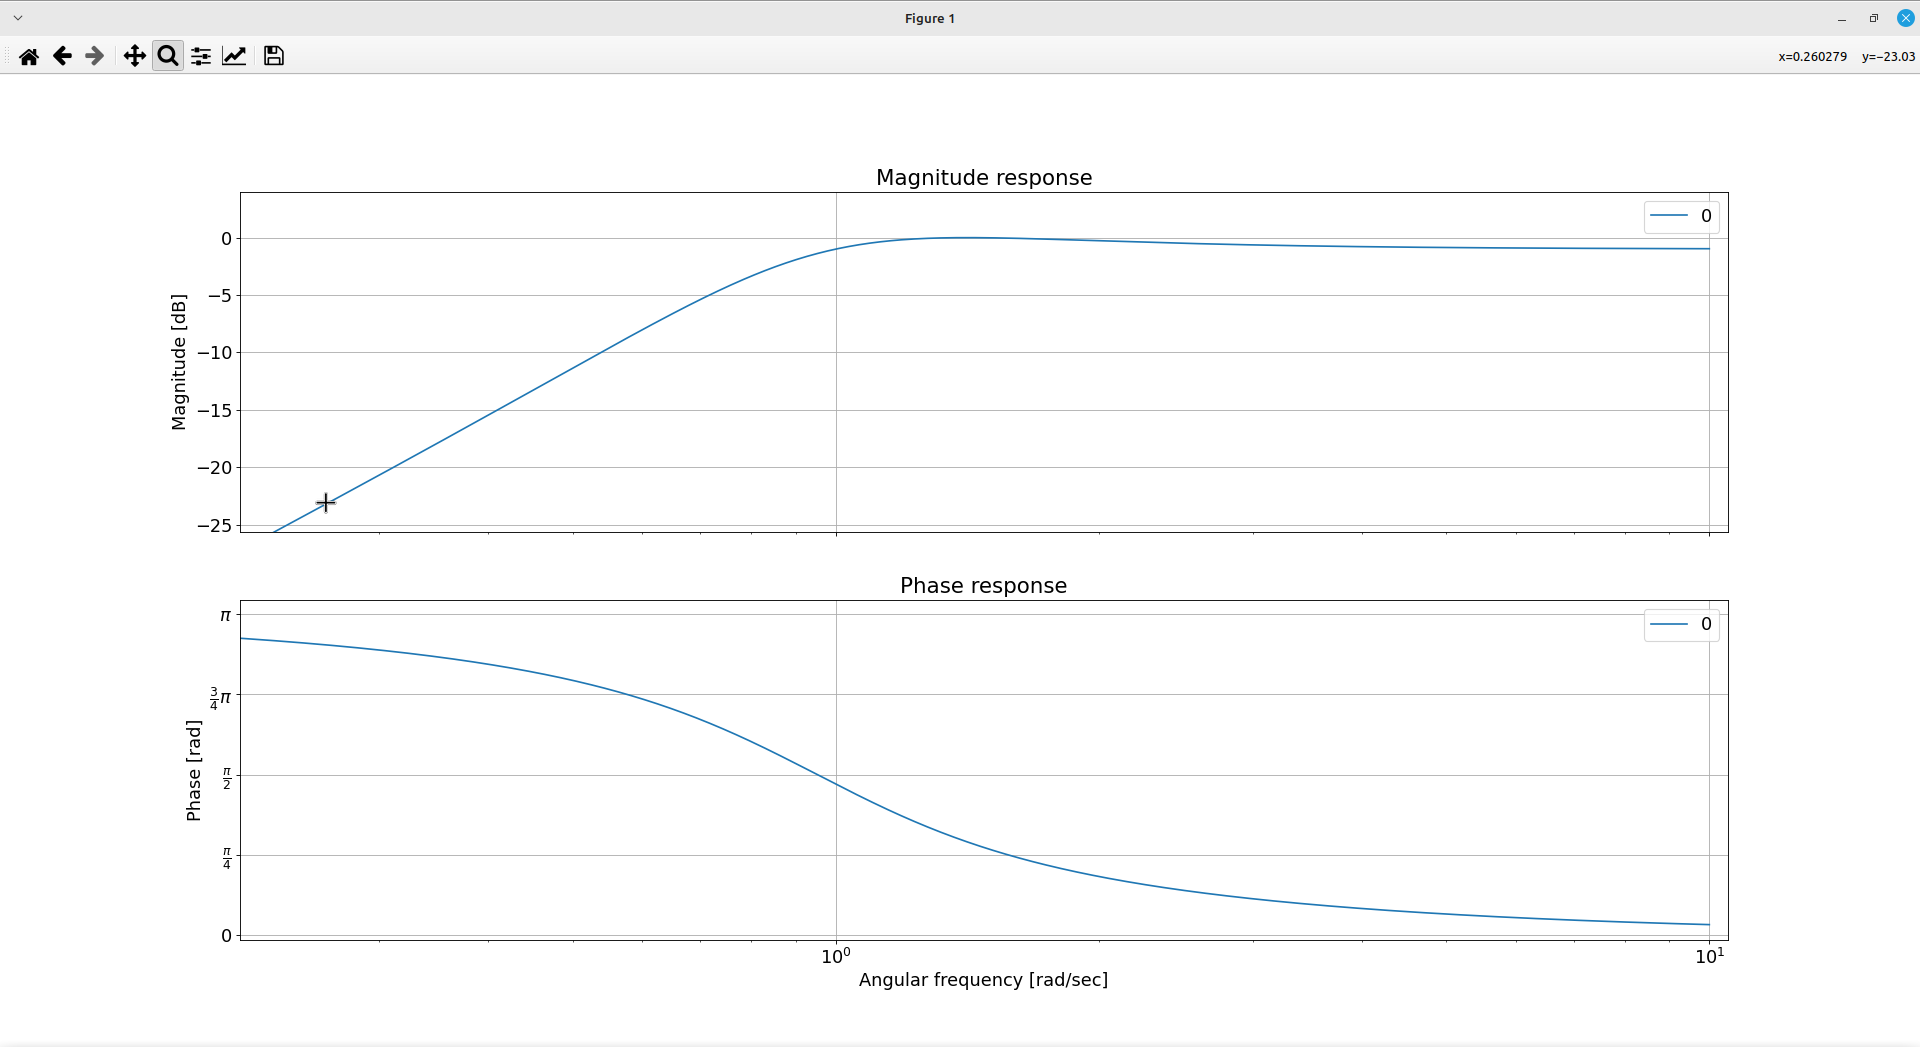

Se ve que para la frecuencia normalizada de paso se tiene una atenuación de -1dB y que para la frecuencia de stop se tiene una atenuación de -23dB, menor a -20dB.

### *VISUALIZACIÓN DE LOS RESULTADOS DEL ANALIZADOR DE ESPECTRO*

En primera instancia, cargo los valores que obtuvimos midiendo con el osciloscopio desde mi tabla de excel

Luego, muestro los .jpeg que me dio el analizador de espectro para comparar las formas.

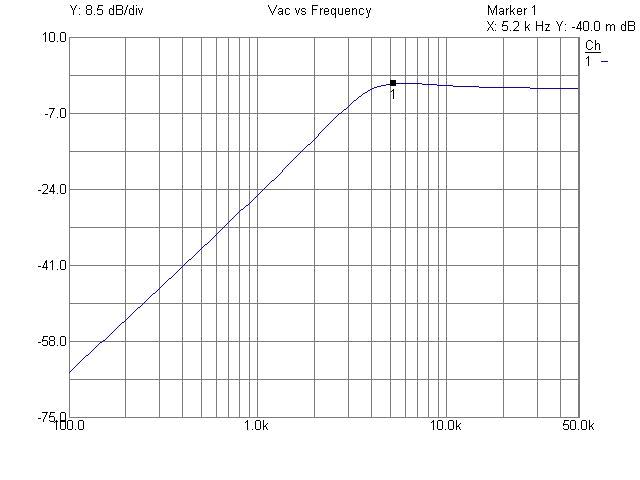

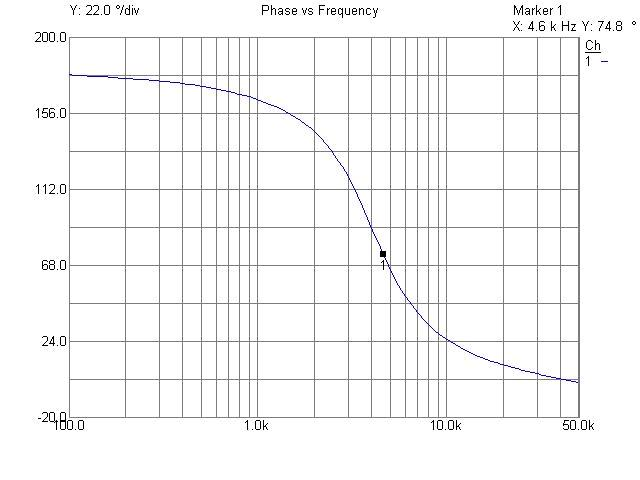

Se ven que los gráficos coinciden con los obtenidos con el osciloscopio. ω0 puede observarse marcada en el gráfico de fase y su valor es 4,6KHz. 

A continuación se planea plotear lo mismo a partir del archivo .csv que me provee el analizador

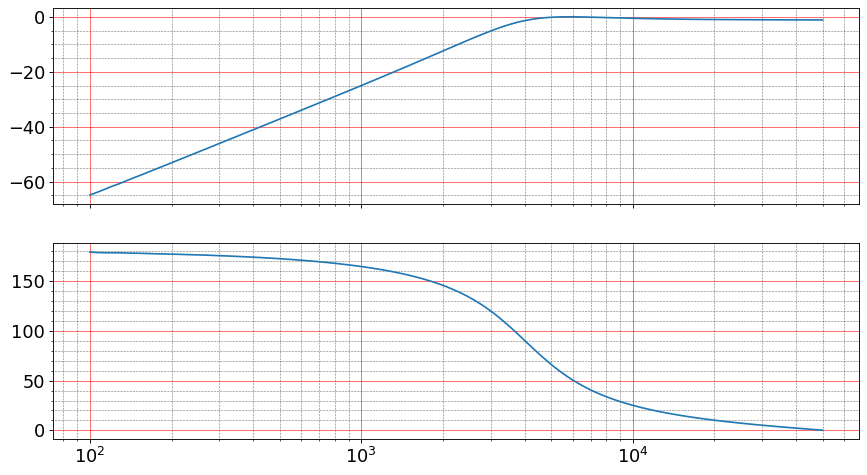

In [11]:
data1 = pd.read_csv('MODULO.csv', delimiter=',')
data2 = pd.read_csv('FASE.csv', delimiter=',')

data1_frec = data1['Frec']
data1_mod = data1['Volt']

data2_frec = data2['Frec']
data2_fase = data2['Fase']

fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True)

ax1.semilogx(data1_frec, data1_mod)
ax1.grid(True)
ax1.minorticks_on()
# Customize the major grid
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

ax2.semilogx(data2_frec, data2_fase)
ax2.grid(True)
ax2.minorticks_on()
# Customize the major grid
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()